In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/商業智慧/CK+48'
sentiment_list = os.listdir(path)
print(sentiment_list)

['contempt', 'surprise', 'happy', 'disgust', 'anger', 'fear', 'sadness']


In [16]:
%config NotebookApp.iopub_data_rate_limit=2000000
import cv2

img_list=[] #圖片
label=[]
i = 0

for file in sentiment_list:
  img_file_list= os.listdir(path+'/'+file)
  print(file, ':', img_file_list)
  print('張數:', len(img_file_list))
  for img in img_file_list:
    img_pic = cv2.imread(path+'/'+file+'/'+img)
    img_pic = cv2.resize(img_pic,(50,50))
    img_list.append(img_pic)
    label.append(i)
  print('label加總:', len(label))
  i = i+1
#print('total img list:',img_list)

contempt : ['S138_008_00000007.png', 'S505_002_00000021.png', 'S154_002_00000011.png', 'S148_002_00000014.png', 'S154_002_00000012.png', 'S504_002_00000009.png', 'S502_002_00000009.png', 'S505_002_00000019.png', 'S139_002_00000011.png', 'S157_002_00000010.png', 'S151_002_00000028.png', 'S506_002_00000007.png', 'S503_002_00000006.png', 'S151_002_00000029.png', 'S506_002_00000008.png', 'S158_002_00000009.png', 'S138_008_00000009.png', 'S158_002_00000010.png', 'S149_002_00000012.png', 'S504_002_00000008.png', 'S149_002_00000011.png', 'S502_002_00000008.png', 'S155_002_00000012.png', 'S895_002_00000005.png', 'S895_002_00000006.png', 'S502_002_00000007.png', 'S160_006_00000010.png', 'S155_002_00000011.png', 'S154_002_00000013.png', 'S158_002_00000011.png', 'S160_006_00000009.png', 'S505_002_00000020.png', 'S147_002_00000012.png', 'S503_002_00000007.png', 'S504_002_00000007.png', 'S139_002_00000012.png', 'S148_002_00000015.png', 'S156_002_00000020.png', 'S506_002_00000009.png', 'S149_002_000

In [17]:
from keras.utils.np_utils import to_categorical

label = np.array(label)
y = to_categorical(label,7)
img_list = np.array(img_list)
img_list = img_list.astype('float32')
img_list = img_list/255
print(img_list[0].shape, len(img_list),type(img_list), type(y), y.shape, y)

(50, 50, 3) 981 <class 'numpy.ndarray'> <class 'numpy.ndarray'> (981, 7) [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [53]:
#dic = {'disgust':'1', 'anger':'2', 'sadness':'3', 'surprise':'4', 'fear':'5', 'contempt':'6', 'happy':'7'}

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2, random_state=1, shuffle=True)
print(len(x_train), x_train.shape, len(y_train), y_train.shape, len(x_test), len(y_test))

784 (784, 50, 50, 3) 784 (784, 7) 197 197


In [19]:
from keras.models import Sequential
from keras.layers import Dense, activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Input, layers


model_input = layers.Input(shape=(50,50,3),name='cnn_input')
x = layers.Conv2D(32,3,activation='relu',name='Conv2D-32')(model_input)
x = layers.MaxPooling2D(name='max-pooling1')(x)
x = layers.Conv2D(48,3,activation='relu',name='Conv2D-48')(x)
x = layers.MaxPooling2D(name='max-pooling2')(x)
x = layers.Conv2D(64,3,activation='relu',name='Conv2D-64')(x)
x = layers.MaxPooling2D(name='max-pooling3')(x)
x = layers.Flatten(name='cnn_flatten')(x)
output = layers.Dense(7, activation='softmax', name='output_dense')(x)

CNN_model = Model(model_input, output, name='CNN_model')
adam = Adam(learning_rate=1)
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 50, 50, 3)]       0         
                                                                 
 Conv2D-32 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max-pooling1 (MaxPooling2D)  (None, 24, 24, 32)       0         
                                                                 
 Conv2D-48 (Conv2D)          (None, 22, 22, 48)        13872     
                                                                 
 max-pooling2 (MaxPooling2D)  (None, 11, 11, 48)       0         
                                                                 
 Conv2D-64 (Conv2D)          (None, 9, 9, 64)          27712     
                                                                 
 max-pooling3 (MaxPooling2D)  (None, 4, 4, 64)         0 

In [20]:
history = CNN_model.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=128)   
CNN_model.evaluate(x_test, y_test) 

Epoch 1/40
5/5 [==============================] - 2s 336ms/step - loss: 1.8861 - accuracy: 0.2057 - val_loss: 1.7997 - val_accuracy: 0.2548
Epoch 2/40
5/5 [==============================] - 1s 281ms/step - loss: 1.8137 - accuracy: 0.2695 - val_loss: 1.7844 - val_accuracy: 0.3631
Epoch 3/40
5/5 [==============================] - 1s 279ms/step - loss: 1.8055 - accuracy: 0.2951 - val_loss: 1.7690 - val_accuracy: 0.3694
Epoch 4/40
5/5 [==============================] - 1s 282ms/step - loss: 1.7860 - accuracy: 0.2632 - val_loss: 1.7390 - val_accuracy: 0.2548
Epoch 5/40
5/5 [==============================] - 1s 278ms/step - loss: 1.7504 - accuracy: 0.3349 - val_loss: 1.7063 - val_accuracy: 0.4586
Epoch 6/40
5/5 [==============================] - 1s 300ms/step - loss: 1.7091 - accuracy: 0.4099 - val_loss: 1.6422 - val_accuracy: 0.4841
Epoch 7/40
5/5 [==============================] - 2s 476ms/step - loss: 1.6437 - accuracy: 0.4179 - val_loss: 1.5445 - val_accuracy: 0.5732
Epoch 8/40
5/5 [====

[0.12437789142131805, 0.9593908786773682]

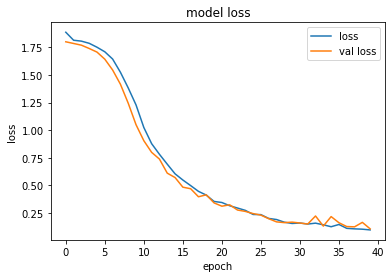

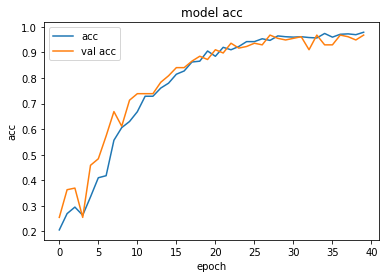

In [21]:
from matplotlib import legend
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [23]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


7/7 [==============================] - 0s 28ms/step


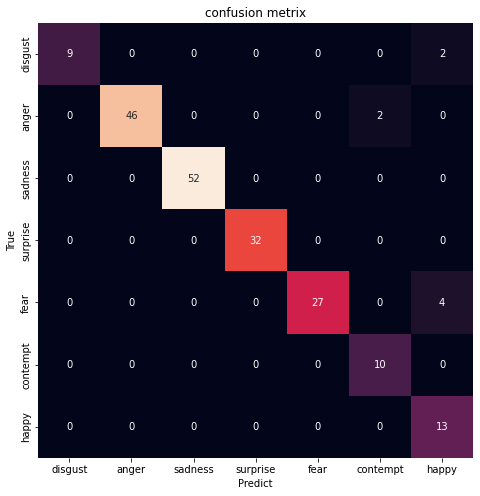

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = CNN_model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_1 = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_1, y_predict)

s = ['disgust', 'anger', 'sadness', 'surprise', 'fear', 'contempt', 'happy']

plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xticklabels(s, fontsize=10)
ax.set_yticklabels(s, fontsize=10)
plt.title('confusion metrix')
plt.xlabel('Predict', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()
